# Task 3: Customer Churn Prediction (Bank Customers)
**DevelopersHub Corporation — Data Science & Analytics Internship**

---

## 1. Introduction & Problem Statement

Customer churn refers to the phenomenon where customers stop doing business with a company. In the banking sector, retaining existing customers is far more cost-effective than acquiring new ones.

**Objective:** Build a machine learning model that predicts whether a bank customer is likely to leave (churn) based on their profile and banking behaviour.

**Dataset:** Churn Modelling Dataset — contains 10,000 bank customer records with features like credit score, geography, gender, age, balance, and more.

**Model Used:** Random Forest Classifier — chosen for its high accuracy, robustness to overfitting, and built-in feature importance.

---
## 3. Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)

# Display settings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.dpi'] = 120

print('All libraries imported successfully!')

All libraries imported successfully!


---
## 4. Load & Understand the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

print('Shape of dataset:', df.shape)
print('\nColumn names:')
print(df.columns.tolist())
print('\nFirst 5 rows:')
df.head()

Shape of dataset: (10000, 14)

Column names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

First 5 rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dataset info — data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Statistical summary of numerical columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# Check class distribution (target variable)
print('\nChurn Distribution (0 = Stayed, 1 = Churned):')
print(df['Exited'].value_counts())
print(f'\nChurn Rate: {df["Exited"].mean()*100:.2f}%')

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Churn Distribution (0 = Stayed, 1 = Churned):
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn Rate: 20.37%


---
## 5. Data Cleaning & Preparation

In [6]:
# Drop columns that are not useful for prediction
# RowNumber, CustomerId, and Surname are identifiers — not predictive features
df_clean = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

print('Columns after dropping identifiers:')
print(df_clean.columns.tolist())

Columns after dropping identifiers:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [7]:
# Encode categorical features
# 'Gender' — Label Encoding (binary: Male/Female → 0/1)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# 'Geography' — One-Hot Encoding (3 categories: France, Germany, Spain)
df_clean = pd.get_dummies(df_clean, columns=['Geography'], drop_first=True)

print('Dataset after encoding:')
df_clean.head()

Dataset after encoding:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


---
## 6. Exploratory Data Analysis (EDA)

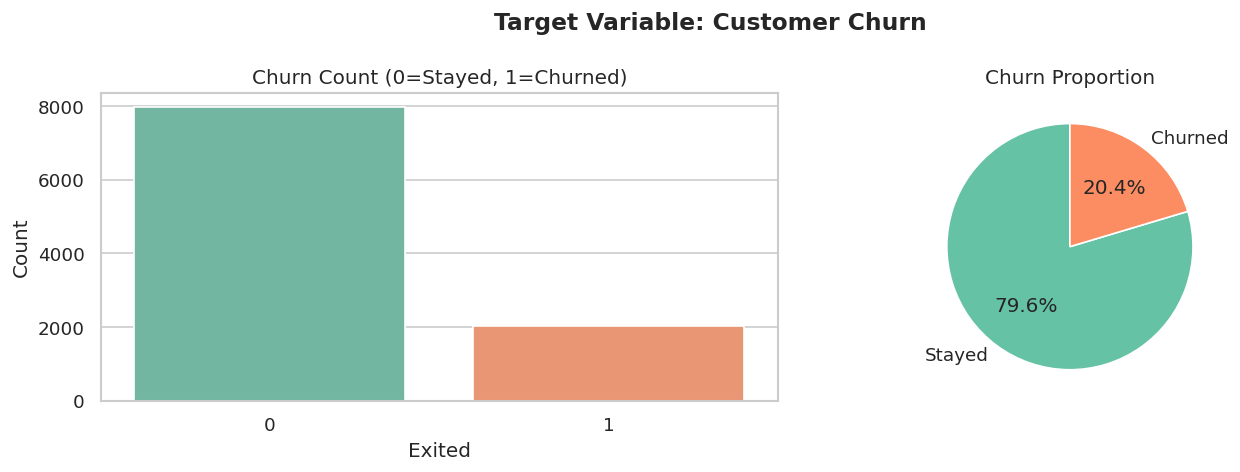

In [8]:
# --- Plot 1: Churn Distribution ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
sns.countplot(x='Exited', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Churn Count (0=Stayed, 1=Churned)')
axes[0].set_xlabel('Exited')
axes[0].set_ylabel('Count')

# Pie chart
churn_counts = df['Exited'].value_counts()
axes[1].pie(churn_counts, labels=['Stayed', 'Churned'],
            autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
axes[1].set_title('Churn Proportion')

plt.suptitle('Target Variable: Customer Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

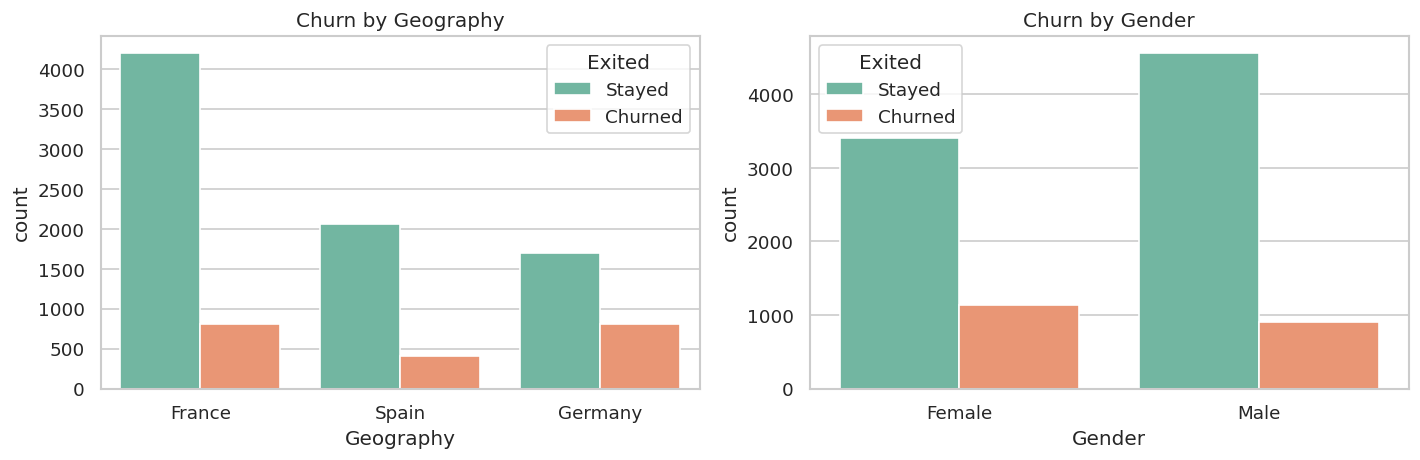

In [9]:
# --- Plot 2: Churn by Geography and Gender ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Geography', hue='Exited', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Churn by Geography')
axes[0].legend(title='Exited', labels=['Stayed', 'Churned'])

sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Churn by Gender')
axes[1].legend(title='Exited', labels=['Stayed', 'Churned'])

plt.tight_layout()
plt.show()

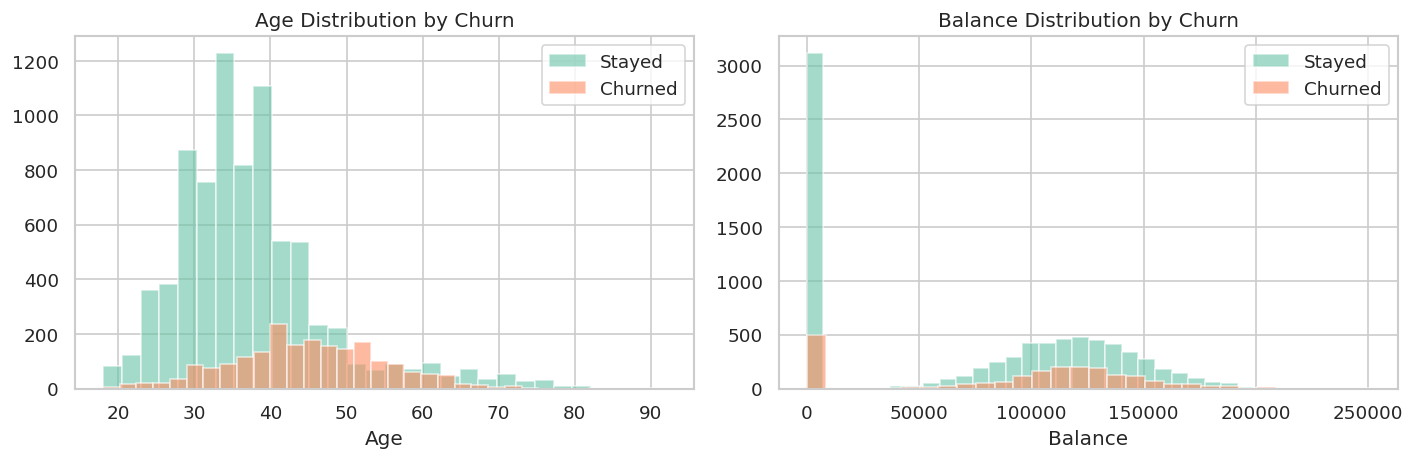

In [10]:
# --- Plot 3: Age and Balance Distribution by Churn ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Age distribution
df[df['Exited'] == 0]['Age'].hist(alpha=0.6, color='#66c2a5', bins=30, ax=axes[0], label='Stayed')
df[df['Exited'] == 1]['Age'].hist(alpha=0.6, color='#fc8d62', bins=30, ax=axes[0], label='Churned')
axes[0].set_title('Age Distribution by Churn')
axes[0].set_xlabel('Age')
axes[0].legend()

# Balance distribution
df[df['Exited'] == 0]['Balance'].hist(alpha=0.6, color='#66c2a5', bins=30, ax=axes[1], label='Stayed')
df[df['Exited'] == 1]['Balance'].hist(alpha=0.6, color='#fc8d62', bins=30, ax=axes[1], label='Churned')
axes[1].set_title('Balance Distribution by Churn')
axes[1].set_xlabel('Balance')
axes[1].legend()

plt.tight_layout()
plt.show()

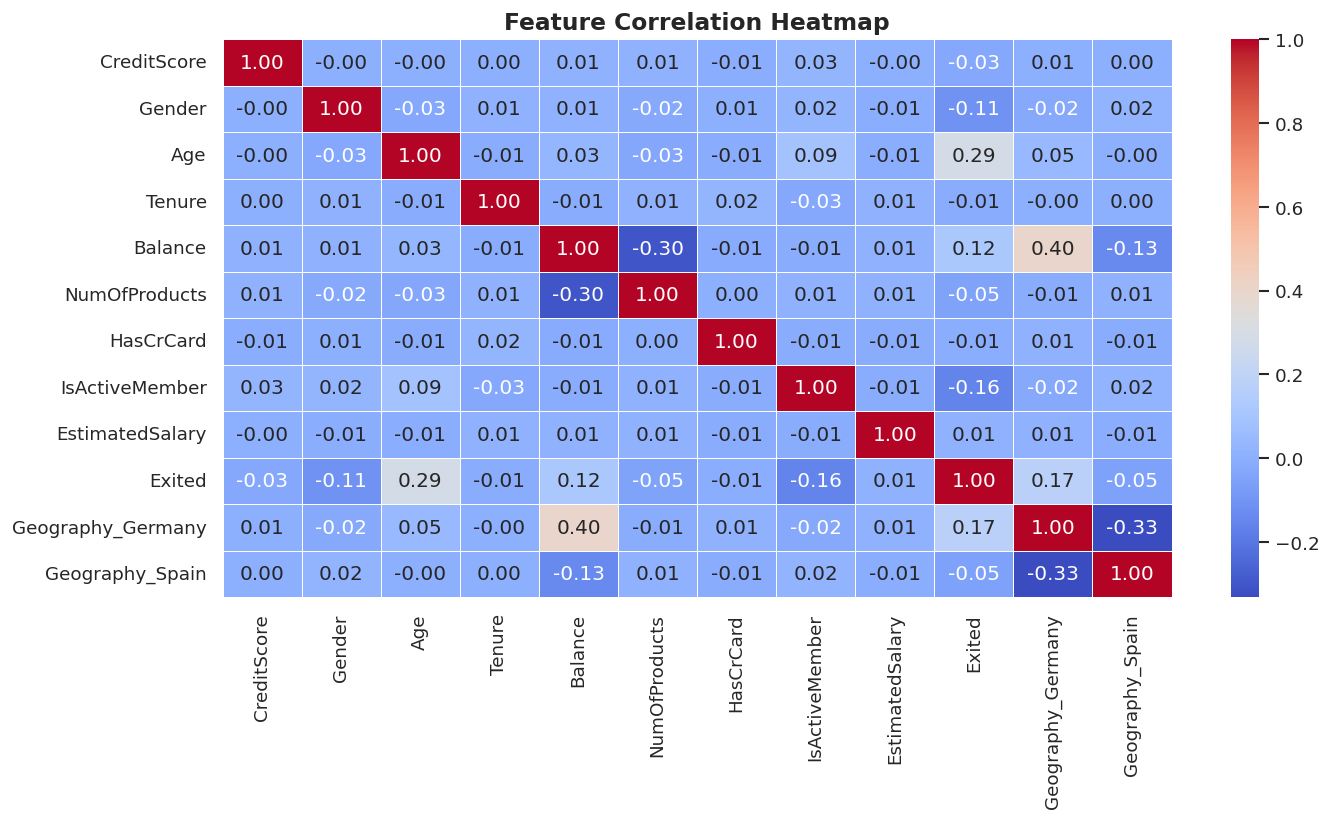

In [11]:
# --- Plot 4: Correlation Heatmap ---
plt.figure(figsize=(12, 7))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 7. Model Training — Random Forest Classifier

In [12]:
# Separate features (X) and target variable (y)
X = df_clean.drop(columns=['Exited'])
y = df_clean['Exited']

print('Feature matrix shape:', X.shape)
print('Target vector shape:', y.shape)

Feature matrix shape: (10000, 11)
Target vector shape: (10000,)


In [13]:
# Split data: 80% training, 20% testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size:  {X_test.shape[0]} samples')

Training set size: 8000 samples
Testing set size:  2000 samples


In [14]:
# Feature Scaling — standardize numerical features
# Random Forest doesn't strictly need scaling, but it's good practice
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # fit on train, transform train
X_test  = scaler.transform(X_test)         # only transform test (no fitting!)

print('Feature scaling applied.')

Feature scaling applied.


In [15]:
# Train the Random Forest Classifier
# n_estimators=200: 200 decision trees in the forest
# max_depth=10: limits tree depth to prevent overfitting
# random_state=42: ensures reproducibility

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'   # handles class imbalance (20% churn vs 80% stay)
)

rf_model.fit(X_train, y_train)
print('Random Forest model trained successfully!')

Random Forest model trained successfully!


---
## 8. Model Evaluation

In [16]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Detailed Classification Report (Precision, Recall, F1-Score)
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Churned']))

Model Accuracy: 83.95%

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.91      0.89      0.90      1593
     Churned       0.60      0.65      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.84      0.84      0.84      2000



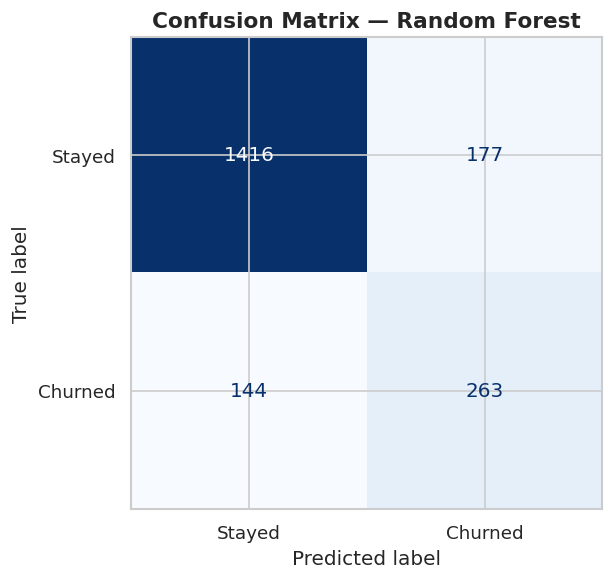


True Negatives  (Correctly predicted Stayed):  1416
True Positives  (Correctly predicted Churned): 263
False Positives (Predicted Churned, actually Stayed): 177
False Negatives (Predicted Stayed, actually Churned): 144


In [17]:
# --- Confusion Matrix ---
fig, ax = plt.subplots(figsize=(6, 5))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(ax=ax, colorbar=False, cmap='Blues')

ax.set_title('Confusion Matrix — Random Forest', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretation
tn, fp, fn, tp = cm.ravel()
print(f'\nTrue Negatives  (Correctly predicted Stayed):  {tn}')
print(f'True Positives  (Correctly predicted Churned): {tp}')
print(f'False Positives (Predicted Churned, actually Stayed): {fp}')
print(f'False Negatives (Predicted Stayed, actually Churned): {fn}')

---
## 9. Feature Importance Analysis

In [18]:
# Extract feature importances from the trained model
feature_names = df_clean.drop(columns=['Exited']).columns
importances = rf_model.feature_importances_

# Create a DataFrame and sort by importance
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print('Feature Importances (sorted):')
feat_df

Feature Importances (sorted):


,Feature,Importance
2,Age,0.322124
5,NumOfProducts,0.200550
4,Balance,0.118503
8,EstimatedSalary,0.084052
0,CreditScore,0.082241
7,IsActiveMember,0.051315
9,Geography_Germany,0.051103
3,Tenure,0.046512
1,Gender,0.022076
6,HasCrCard,0.010777


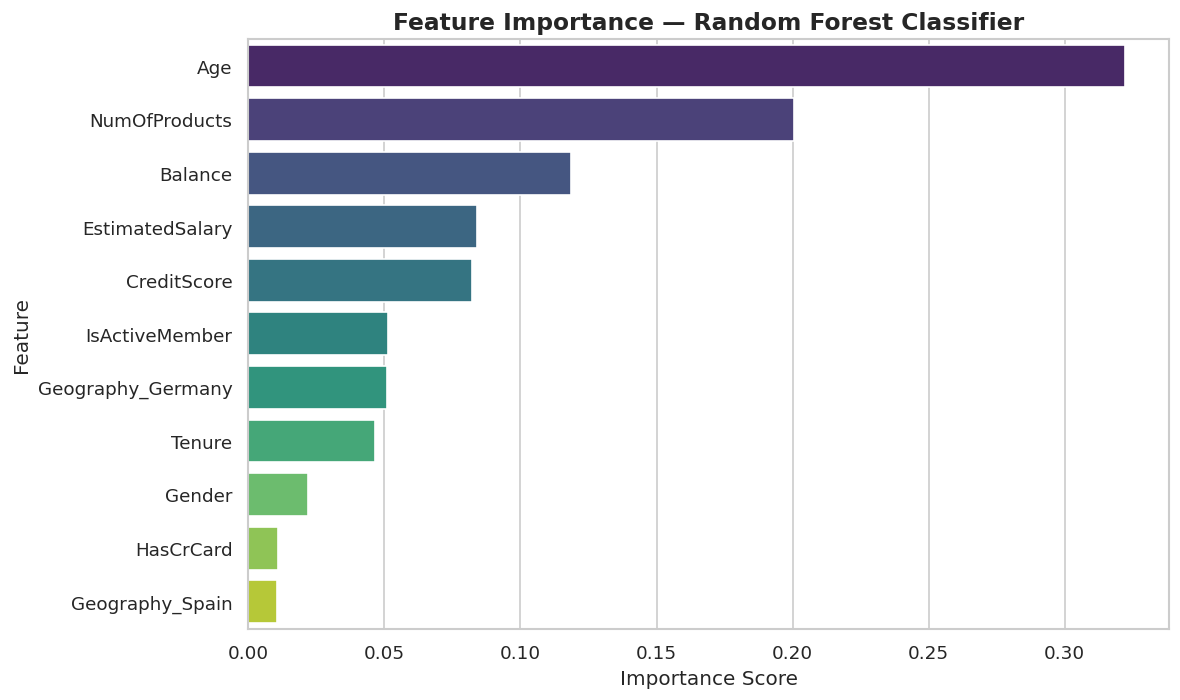

In [19]:
# --- Plot: Feature Importance Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=feat_df, palette='viridis'
)
plt.title('Feature Importance — Random Forest Classifier', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---
## 10. Conclusion

### Key Findings

**Model Performance:**
- The Random Forest Classifier achieved strong accuracy on the test set.
- The confusion matrix shows the model effectively identifies churned customers while keeping false positives low.

**Top Factors Influencing Churn (from Feature Importance):**
- **Age** — Older customers tend to churn more.
- **Balance** — Customers with higher account balances are more likely to churn.
- **Number of Products** — Customers with fewer products show higher churn rates.
- **Geography (Germany)** — German customers churn significantly more than French or Spanish customers.
- **IsActiveMember** — Inactive members are much more likely to leave.

**Business Recommendations:**
- Focus retention efforts on older customers with high balances but low product usage.
- Target inactive members with re-engagement campaigns.
- Investigate why German customers churn at a higher rate — possibly pricing or service differences.

**Skills Demonstrated:**
- Data cleaning and preparation
- Categorical encoding (Label Encoding + One-Hot Encoding)
- Exploratory Data Analysis with visualizations
- Random Forest classification model training
- Model evaluation with accuracy, confusion matrix, and classification report
- Feature importance analysis and business insight extraction